In [1]:
def print_df(df):
    print(df.to_string(index=False))

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.jleague.co/standings/j1/2024/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text.strip().replace(' ', '') for header in table.find_all('th')]
rows = []
club_links = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols_text = [col.text.strip() for col in cols]
    cols_text[-1] = '-'.join(cols_text[-1].split()) 
    club_link = row.find('a')['href']
    cols_text.insert(1, f"https://www.jleague.co{club_link}")
    club_links.append(f"https://www.jleague.co{club_link}")
    rows.append(cols_text)

    
headers.insert(1, 'Link')
df = pd.DataFrame(rows, columns=headers)
df.rename(columns={'CLUB': 'Team Name', 'POS' : 'Position', 'FORM' : 'Form', 'PTS' : 'Points'}, inplace=True)
df['Team Name'] = df['Team Name'].replace('Yokohama F･Marinos', 'Yokohama F.Marinos')
print_df(df)


Position                                                     Link                  Team Name  P  W D  L GF GA  GD Points      Form
       1          https://www.jleague.co/clubs/FC-Machida-Zelvia/          FC Machida Zelvia 18 12 2  4 31 16  15     38 W-W-W-L-W
       2            https://www.jleague.co/clubs/Kashima-Antlers/            Kashima Antlers 18 11 3  4 31 20  11     36 W-W-W-W-D
       3                https://www.jleague.co/clubs/Gamba-Osaka/                Gamba Osaka 18 10 4  4 19 13   6     34 D-W-W-W-W
       4                https://www.jleague.co/clubs/Vissel-Kobe/                Vissel Kobe 18 10 3  5 26 13  13     33 W-L-L-D-W
       5        https://www.jleague.co/clubs/Sanfrecce-Hiroshima/        Sanfrecce Hiroshima 17  7 8  2 32 16  16     29 L-W-D-W-W
       6               https://www.jleague.co/clubs/Cerezo-Osaka/               Cerezo Osaka 18  7 7  4 25 20   5     28 L-W-D-D-W
       7             https://www.jleague.co/clubs/Avispa-Fukuoka/             Avisp

In [3]:
df.dtypes

Position     object
Link         object
Team Name    object
P            object
W            object
D            object
L            object
GF           object
GA           object
GD           object
Points       object
Form         object
dtype: object

In [4]:
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)
df['GD'] = df['GD'].astype(int)
df['Position'] = df['Position'].astype(int)
df['Points'] = df['Points'].astype(int)
df['P'] = df['P'].astype(int)
df['W'] = df['W'].astype(int)
df['D'] = df['D'].astype(int)
df['L'] = df['L'].astype(int)
df['Team Name'] = df['Team Name'].astype(str)
df['Form'] = df['Form'].astype(str)

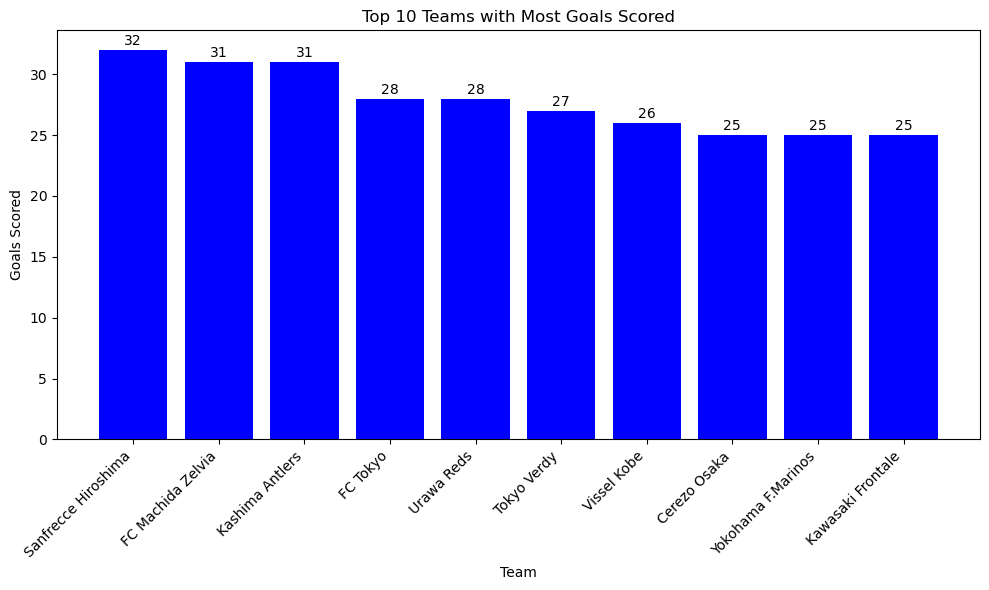

In [5]:
top_scorers = df.sort_values(by='GF', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Team Name'], top_scorers['GF'], color='blue')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.title('Top 10 Teams with Most Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for index, value in enumerate(top_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center', va='bottom')
plt.show()


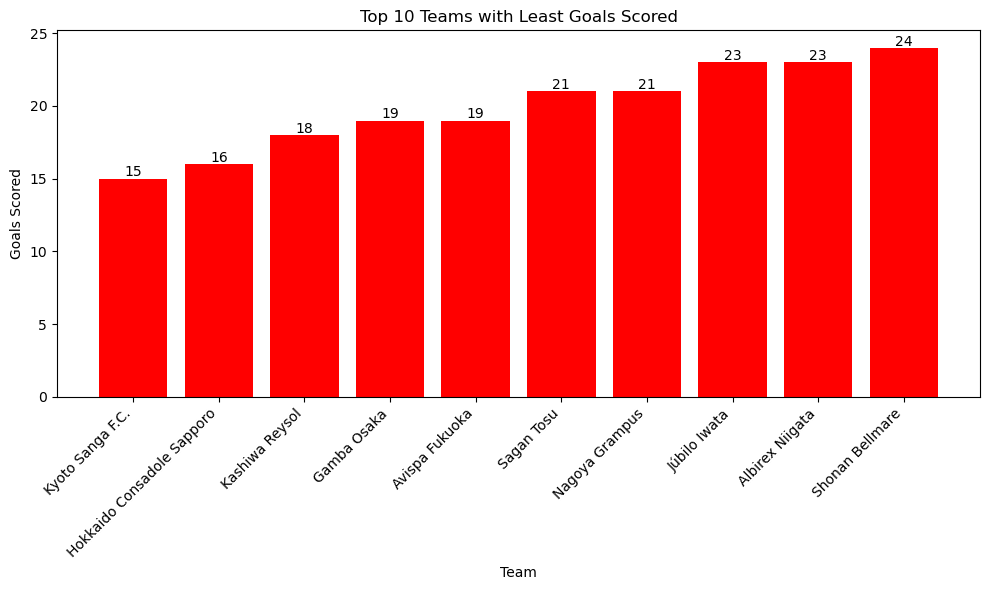

In [6]:
less_scorers = df.sort_values(by='GF', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(less_scorers['Team Name'], less_scorers['GF'], color = 'red')
for index, value in enumerate(less_scorers['GF']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Scored')
plt.xlabel('Team')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
grouped = df.groupby('GF')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Scored', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Scored', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Scored  Count of Teams                                          Team Names
                 32               1                                 Sanfrecce Hiroshima
                 31               2                  FC Machida Zelvia, Kashima Antlers
                 28               2                                FC Tokyo, Urawa Reds
                 27               1                                         Tokyo Verdy
                 26               1                                         Vissel Kobe
                 25               3 Cerezo Osaka, Yokohama F.Marinos, Kawasaki Frontale
                 24               1                                     Shonan Bellmare
                 23               2                       Albirex Niigata, Júbilo Iwata
                 21               2                          Nagoya Grampus, Sagan Tosu
                 19               2                         Gamba Osaka, Avispa Fukuoka
                 18             

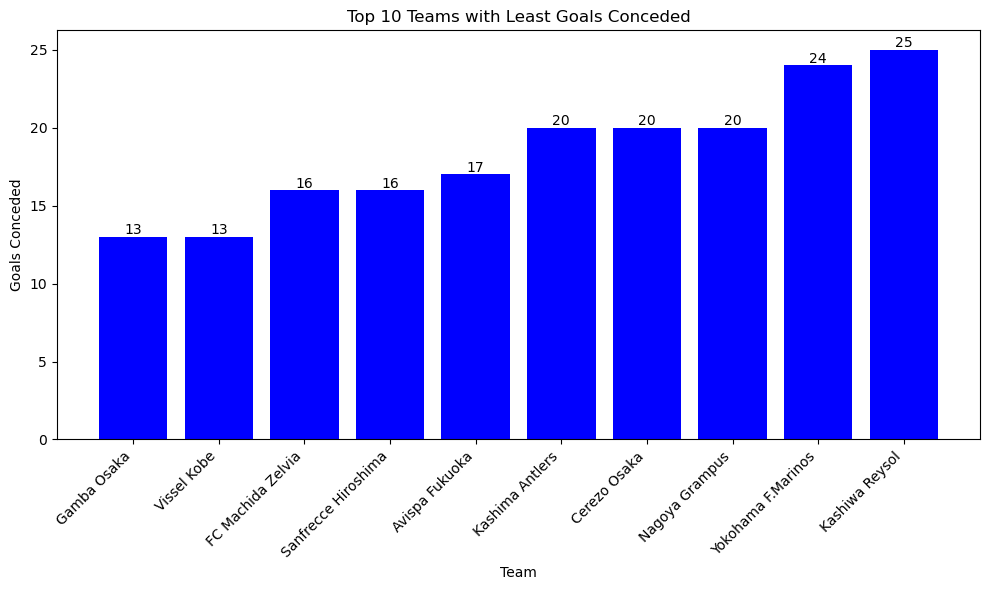

In [8]:
best_defense = df.sort_values(by='GA', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.bar(best_defense['Team Name'], best_defense['GA'], color = 'blue')
for index, value in enumerate(best_defense['GA']):
    plt.text(index, value + 0.15, str(value), ha='center')
plt.title('Top 10 Teams with Least Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

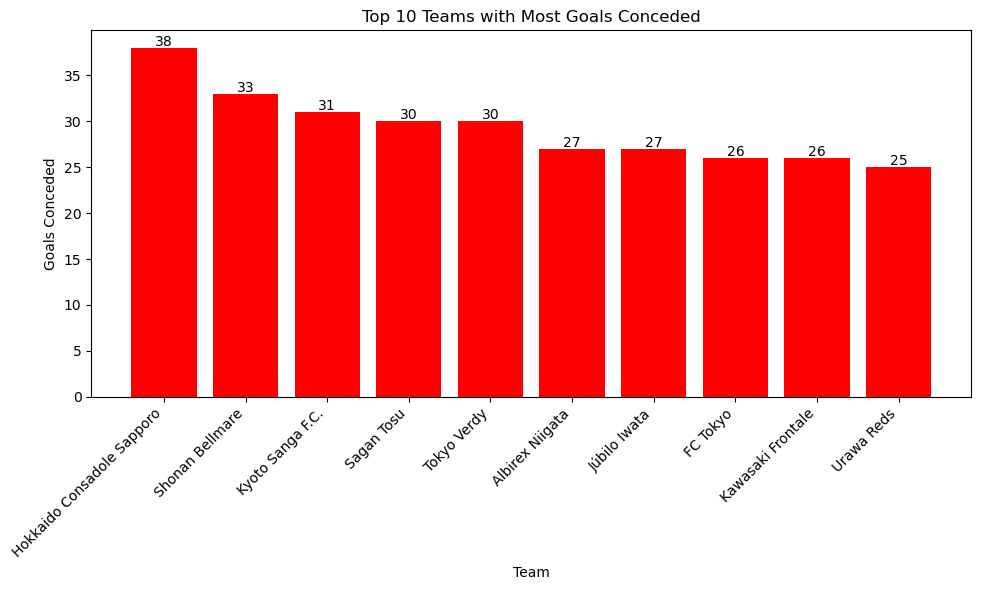

In [9]:
worst_defense = df.sort_values(by='GA', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(worst_defense['Team Name'], worst_defense['GA'], color = 'red')
for index, value in enumerate(worst_defense['GA']):
    plt.text(index, value + 0.2, str(value), ha='center')
plt.title('Top 10 Teams with Most Goals Conceded')
plt.xlabel('Team')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
grouped = df.groupby('GA')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Goals Conceded', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Total Goals Conceded', ascending=True).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Total Goals Conceded  Count of Teams                                    Team Names
                   13               2                      Gamba Osaka, Vissel Kobe
                   16               2        FC Machida Zelvia, Sanfrecce Hiroshima
                   17               1                                Avispa Fukuoka
                   20               3 Kashima Antlers, Cerezo Osaka, Nagoya Grampus
                   24               1                            Yokohama F.Marinos
                   25               2                    Urawa Reds, Kashiwa Reysol
                   26               2                   FC Tokyo, Kawasaki Frontale
                   27               2                 Albirex Niigata, Júbilo Iwata
                   30               2                       Tokyo Verdy, Sagan Tosu
                   31               1                              Kyoto Sanga F.C.
                   33               1                               Shonan B

In [11]:
def calculate_points(form):
    points = 0
    for result in form.split('-'):
        if result == 'W':
            points += 3
        elif result == 'D':
            points += 1
    return points

df['Points over the last 5 games'] = df['Form'].apply(calculate_points)

l5p = df[['Position','Team Name', 'Points over the last 5 games']].sort_values(by='Points over the last 5 games', ascending=False).reset_index(drop=True)

print_df(l5p)


 Position                  Team Name  Points over the last 5 games
        3                Gamba Osaka                            13
        2            Kashima Antlers                            13
        1          FC Machida Zelvia                            12
        5        Sanfrecce Hiroshima                            10
        7             Avispa Fukuoka                             9
        9             Nagoya Grampus                             8
        6               Cerezo Osaka                             8
       15            Albirex Niigata                             7
       11                Tokyo Verdy                             7
        4                Vissel Kobe                             7
       18                 Sagan Tosu                             6
       10                 Urawa Reds                             5
        8                   FC Tokyo                             5
       16               Júbilo Iwata                          

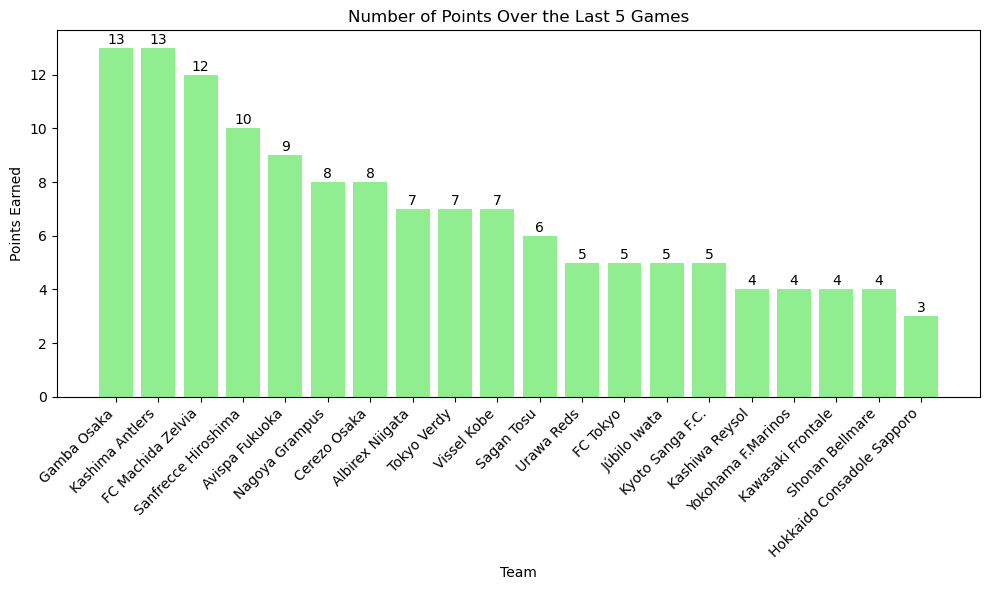

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(l5p['Team Name'], l5p['Points over the last 5 games'], color = 'lightgreen')
for index, value in enumerate(l5p['Points over the last 5 games']):
    plt.text(index,value + 0.15, str(value), ha='center')
plt.title('Number of Points Over the Last 5 Games')
plt.xlabel('Team')
plt.ylabel('Points Earned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

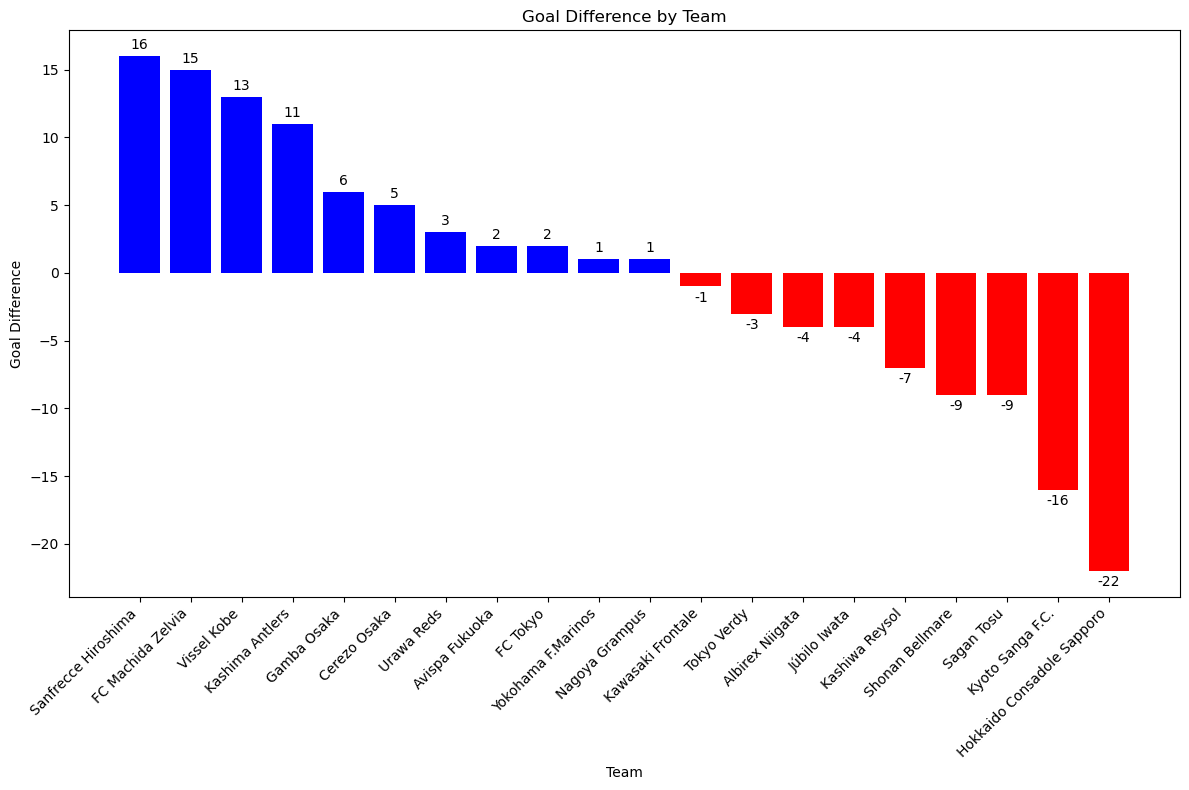

In [13]:
df2 = df.sort_values(by='GD', ascending=False)
colors = ['blue' if val >= 0 else 'red' for val in df2['GD']]
plt.figure(figsize=(12,8))
bars = plt.bar(df2['Team Name'], df2['GD'], color=colors)
for bar, value in zip(bars, df2['GD']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3 if value >= 0 else bar.get_height() - 0.3,
             str(value), ha='center', va='bottom' if value >= 0 else 'top')
plt.title('Goal Difference by Team')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
grouped = df.groupby('GD')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Goal Difference', 'Count of Teams', 'Team Names']

grouped = grouped.sort_values(by='Goal Difference', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = None

print_df(grouped)

 Goal Difference  Count of Teams                         Team Names
              16               1                Sanfrecce Hiroshima
              15               1                  FC Machida Zelvia
              13               1                        Vissel Kobe
              11               1                    Kashima Antlers
               6               1                        Gamba Osaka
               5               1                       Cerezo Osaka
               3               1                         Urawa Reds
               2               2           Avispa Fukuoka, FC Tokyo
               1               2 Nagoya Grampus, Yokohama F.Marinos
              -1               1                  Kawasaki Frontale
              -3               1                        Tokyo Verdy
              -4               2      Albirex Niigata, Júbilo Iwata
              -7               1                     Kashiwa Reysol
              -9               2        Shonan B

In [15]:
grouped = df.groupby('Points')['Team Name'].agg(['count', lambda x: ', '.join(x)]).reset_index()
grouped.columns = ['Total Points', 'Count of Teams', 'Team Names']
grouped = grouped.sort_values(by='Total Points', ascending=False).reset_index(drop=True)
print_df(grouped)

 Total Points  Count of Teams                                             Team Names
           38               1                                      FC Machida Zelvia
           36               1                                        Kashima Antlers
           34               1                                            Gamba Osaka
           33               1                                            Vissel Kobe
           29               1                                    Sanfrecce Hiroshima
           28               2                           Cerezo Osaka, Avispa Fukuoka
           27               2                               FC Tokyo, Nagoya Grampus
           25               1                                             Urawa Reds
           24               1                                            Tokyo Verdy
           22               1                                         Kashiwa Reysol
           20               3 Yokohama F.Marinos, Kawasaki Fronta

In [16]:
df['Points Per Game'] = df['Points'] / df['P']

df_sorted = df.sort_values(by='Points Per Game', ascending=False)

df_sorted = df_sorted[['Position','Team Name', 'Points Per Game']]

print_df(df_sorted)

 Position                  Team Name  Points Per Game
        1          FC Machida Zelvia         2.111111
        2            Kashima Antlers         2.000000
        3                Gamba Osaka         1.888889
        4                Vissel Kobe         1.833333
        5        Sanfrecce Hiroshima         1.705882
        6               Cerezo Osaka         1.555556
        7             Avispa Fukuoka         1.555556
        8                   FC Tokyo         1.500000
        9             Nagoya Grampus         1.500000
       10                 Urawa Reds         1.388889
       11                Tokyo Verdy         1.333333
       13         Yokohama F.Marinos         1.250000
       12             Kashiwa Reysol         1.222222
       14          Kawasaki Frontale         1.111111
       15            Albirex Niigata         1.111111
       16               Júbilo Iwata         1.055556
       17            Shonan Bellmare         0.833333
       18                 Sa